In [1]:
import oritelib as orite
import numpy  as np
import matplotlib.pyplot as plt

In [2]:
og_seq = orite.seq_from_fasta("test_data/exciting_bacteria/Agrobacterium_fabrum_L1_FASTA.fasta")
nc_intervals = orite.genbank_to_non_coding_intervals("test_data/exciting_bacteria/Agrobacterium_fabrum_L1_GB.gb")
og_gc, og_cgc = orite.gc_skew_sliding_window(og_seq, 1000)

In [3]:
max_things = orite.max_rotate_seq_and_skew_calc(og_seq, window_radius=250000)

inital max gc skew indx 1153538
max cgc skew indx 235836


In [4]:
max_cg = max_things[0]
max_cgc = max_things[1]
max_fasta = max_things[2]
max_offset = max_things[3]

In [5]:
nc_intervals_list =nc_intervals[0]

In [6]:
def get_phased_nc_region_list(nc_intervals, og_fasta, max_offset, max_cgc):
    nc_objects = orite.nc_intervals_to_nc_objects(nc_intervals, og_fasta)
    phased_nc_objects = orite.add_max_relative_position(nc_objects, len(og_fasta), max_offset)
    max_scored_nc_objects = orite.calc_score_over_region_list(phased_nc_objects, max_cgc, rotated = True)
    return max_scored_nc_objects
    

In [7]:
x0 = get_phased_nc_region_list(nc_intervals_list, og_seq, max_offset, max_cgc)

In [8]:
#nc_region_list = orite.nc_intervals_to_nc_objects(nc_intervals_list)

In [9]:
len(x0)

2326

In [10]:
x1 = orite.get_kmers_from_region_list(x0, [ 6, 7, 8, 9, 10])
len(x1)

2326

In [11]:
x2 = orite.filter_region_list_by_kmer_occurence(x1, 3)

In [12]:
x3 = orite.filter_empty_kmer_regions(x2)

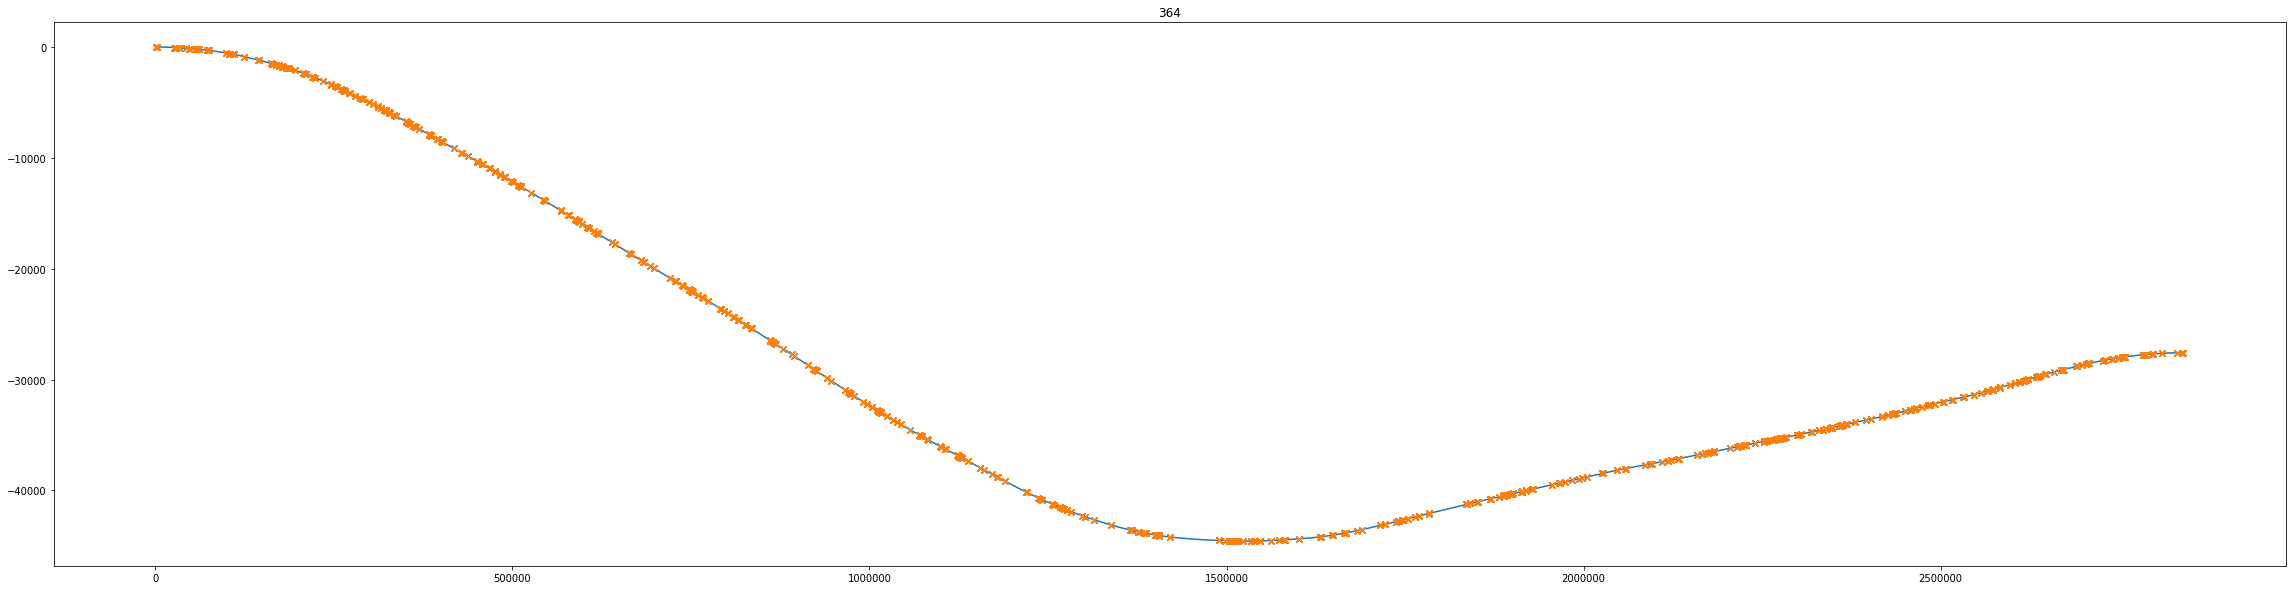

In [13]:
orite.plot_region_list(x3, max_cgc, rotated=True)

In [14]:
x4 = orite.filter_regions_by_length(x3, 50)
len(x4)

363

In [15]:
def calc_density_for_region_list(region_list):
    new_list = []
    
    for region in region_list:
        region.calc_kmer_density()
        new_list.append(region)
    return new_list
    

In [16]:
x5 = calc_density_for_region_list(x4)

In [22]:
def filter_out_empty_kmer_key_in_region_list(region_list):
    
    new_list = []
    
    for region in region_list:
        region.filter_out_empty_kmer_lists_in_kmer_dict()
        new_list.append(region)
    return new_list
    

In [23]:
def sort_region_list_on_density(region_list):
    
    new_list = []
    
    for region in region_list:
        region.sort_kmer_info_by_density()
        new_list.append(region)
    return new_list


In [25]:
x6 = filter_out_empty_kmer_key_in_region_list(x5)

7
[] 
8
[] 
9
[] 
10
[] 
7
[] 
8
[] 
9
[] 
10
[] 
7
[] 
8
[] 
9
[] 
10
[] 
8
[] 
9
[] 
10
[] 
8
[] 
9
[] 
10
[] 
7
[] 
8
[] 
9
[] 
10
[] 
8
[] 
9
[] 
10
[] 
7
[] 
8
[] 
9
[] 
10
[] 
7
[] 
8
[] 
9
[] 
10
[] 
7
[] 
8
[] 
9
[] 
10
[] 
7
[] 
8
[] 
9
[] 
10
[] 
7
[] 
8
[] 
9
[] 
10
[] 
7
[] 
8
[] 
9
[] 
10
[] 
7
[] 
8
[] 
9
[] 
10
[] 
7
[] 
8
[] 
9
[] 
10
[] 
8
[] 
9
[] 
10
[] 
7
[] 
8
[] 
9
[] 
10
[] 
9
[] 
10
[] 
7
[] 
8
[] 
9
[] 
10
[] 
7
[] 
8
[] 
9
[] 
10
[] 
7
[] 
8
[] 
9
[] 
10
[] 
7
[] 
8
[] 
9
[] 
10
[] 
7
[] 
8
[] 
9
[] 
10
[] 
7
[] 
8
[] 
9
[] 
10
[] 
7
[] 
8
[] 
9
[] 
10
[] 
7
[] 
8
[] 
9
[] 
10
[] 
7
[] 
8
[] 
9
[] 
10
[] 
7
[] 
8
[] 
9
[] 
10
[] 
7
[] 
8
[] 
9
[] 
10
[] 
10
[] 
8
[] 
9
[] 
10
[] 
7
[] 
8
[] 
9
[] 
10
[] 
7
[] 
8
[] 
9
[] 
10
[] 
7
[] 
8
[] 
9
[] 
10
[] 
8
[] 
9
[] 
10
[] 
7
[] 
8
[] 
9
[] 
10
[] 
7
[] 
8
[] 
9
[] 
10
[] 
7
[] 
8
[] 
9
[] 
10
[] 
8
[] 
9
[] 
10
[] 
7
[] 
8
[] 
9
[] 
10
[] 
7
[] 
8
[] 
9
[] 
10
[] 
7
[] 
8
[] 
9
[] 
10
[] 
7
[] 
8
[] 
9
[] 
10
[

In [29]:
x7 = sort_region_list_on_density(x6)

In [64]:
i = 0

bla_list = []
for region in x7: 

    if region.kmer_info.get(6) != None:
        
        for line in region.kmer_info.get(6):
            bla_list.append(line)
       

In [66]:
bla_list.sort(key = lambda x:x[2], reverse = True)

In [67]:
bla_list

[('TTTTTT', [3, 210, 211, 212], 1.5),
 ('TTTTTT', [3, 35, 36, 37], 1.5),
 ('AAAAAA', [3, 50, 51, 52], 1.5),
 ('TTTTTT', [3, 83, 84, 85], 1.5),
 ('TTTTTT', [3, 132, 133, 134], 1.5),
 ('AAAAAA', [3, 21, 22, 23], 1.5),
 ('TTTTTT', [3, 87, 88, 89], 1.5),
 ('TTTTTT', [3, 44, 45, 46], 1.5),
 ('TTTTTT', [3, 398, 399, 400], 1.5),
 ('AAAAAA', [3, 19, 20, 21], 1.5),
 ('AAAAAA', [3, 264, 265, 266], 1.5),
 ('AAAAAA', [3, 59, 60, 61], 1.5),
 ('AAAAAA', [3, 276, 277, 278], 1.5),
 ('AAAAAA', [3, 52, 53, 54], 1.5),
 ('TTTTTT', [3, 60, 61, 62], 1.5),
 ('AAAAAA', [3, 53, 54, 55], 1.5),
 ('TTTTTT', [3, 69, 70, 71], 1.5),
 ('AAAAAA', [4, 260, 261, 262, 263], 1.3333333333333333),
 ('CCCCCC', [4, 89, 90, 91, 92], 1.3333333333333333),
 ('CCCCCC', [5, 35, 36, 37, 38, 39], 1.25),
 ('GGGGGG', [5, 118, 119, 120, 121, 122], 1.25),
 ('CCCCCC', [5, 172, 173, 174, 175, 176], 1.25),
 ('TATATA', [3, 202, 204, 206], 0.75),
 ('TCTCTC', [3, 223, 225, 227], 0.75),
 ('TTATTA', [3, 55, 58, 61], 0.5),
 ('AATAAA', [3, 186, 19

In [41]:
x7[5].kmer_info

{6: [('CAAAAT', [3, 245, 351, 545], 0.01),
  ('CGCGGG', [3, 127, 204, 470], 0.008746355685131196),
  ('CCCAGC', [3, 175, 272, 683], 0.005905511811023622),
  ('TGCCAG', [3, 55, 222, 645], 0.005084745762711864),
  ('CAGAAA', [3, 20, 605, 624], 0.004966887417218543)]}

363

In [49]:
d = {'a':2, 'b':5}


In [55]:
x = d.get('r')

In [60]:
x != None

False